In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from mtcnn import MTCNN

In [43]:
mtcnn = MTCNN(keep_all=True, min_face_size=12, thresholds=[0.9, 0.9, 0.9], scale_factor=0.7)

# mtcnn.load_state_dict(torch.load('mtcnn.pt'))

In [44]:
use_own = False

if use_own:
    images_dir = Path('build_dataset/custom/images')
    annot_path = Path('build_dataset/custom/list.txt')
else:
    images_dir = Path('build_dataset/WIDER_test/images')
    annot_path = Path('build_dataset/wider_face_split/wider_face_test_filelist.txt')

with annot_path.open('r') as f:
    test_files = f.readlines()

# 25 57
img = Image.open(str(images_dir / test_files[767].rstrip('\n')))

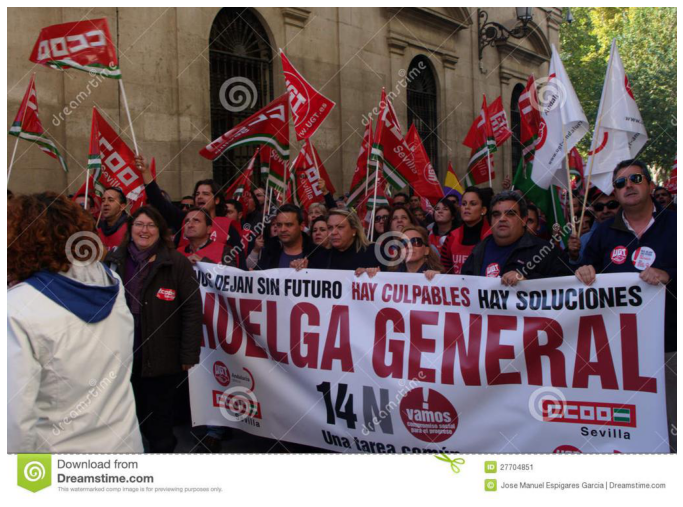

In [45]:
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [46]:
boxes = mtcnn(img)

if boxes is None:
    raise Exception('no face')

len(boxes)

42

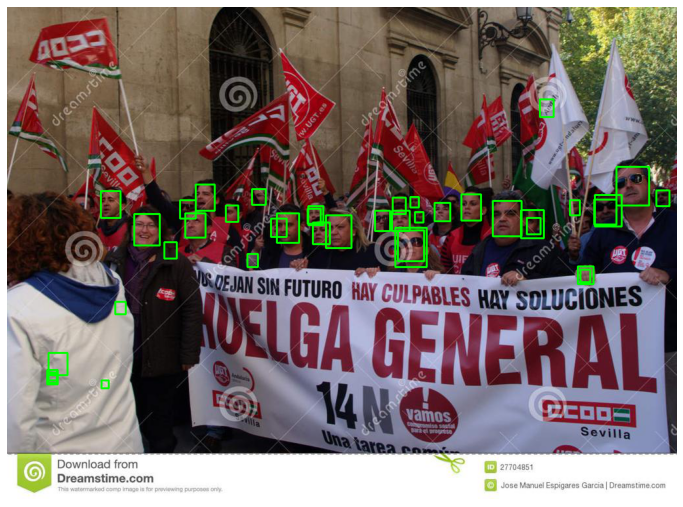

In [47]:
import numpy as np

im_plot = np.array(img).copy()

for box in boxes:
    cv2.rectangle(im_plot, box[:2], box[2:], (0, 255, 0), thickness=2)

plt.figure(figsize=(12,12))
plt.imshow(im_plot)
plt.axis('off')
plt.show()

In [48]:
# torch.save(mtcnn.state_dict(), 'mtcnn.pt')